In [1]:
import numpy as np

from optimize_sequence import optimize_sequence
from abdominal_tools import TargetTissue, AcquisitionBlock, MRFSequence, BLOCKS, create_weightingmatrix, visualize_sequence, sort_sequences

In [2]:
prep_modules = ['noPrep', 'TI12', 'TI300', 'T2prep40', 'T2prep80', 'T2prep160']


In [3]:
target_tissue = TargetTissue(661.5, 56.8, 1)

In [4]:
weighting = '1/T1**2, 1/T2**2, 1/M0**2'

In [5]:
weightingmatrix = create_weightingmatrix(target_tissue, weighting)

In [6]:
prep_order_jaubert = ['TI12', 'noPrep', 'T2prep40', 'T2prep80', 'T2prep160', 'TI300', 'noPrep', 'T2prep40', 'T2prep80', 'T2prep160', 'TI12', 'noPrep']

In [7]:
acq_block_fa_jaubert = np.load('/home/tomgr/Documents/code/abdominal/fa_jaubert.npy')

In [8]:
acq_block_tr_jaubert = np.load('/home/tomgr/Documents/code/abdominal/tr_jaubert.npy')

In [9]:
waittimes_jaubert = [1.2e3 - BLOCKS[name]['ti'] - BLOCKS[name]['t2te'] - sum(acq_block_tr_jaubert) for name in prep_order_jaubert]

In [10]:
acq_block = AcquisitionBlock(acq_block_fa_jaubert, acq_block_tr_jaubert, 1.4)

In [11]:
mrf_sequence_jaubert = MRFSequence(prep_order_jaubert, waittimes_jaubert, acq_block)

In [12]:
mrf_sequence_jaubert.calc_crlb(target_tissue)

In [13]:
weightingmatrix @ mrf_sequence_jaubert.crlb

array([[ 1.87754665e+00, -2.87648224e-02,  1.74896126e-03],
       [-3.90143812e+00,  9.05279797e+00, -1.27515944e-02],
       [ 7.65314401e+02, -4.11397038e+01,  1.10324261e+00]])

In [14]:
count, sequences, timestamp, duration = optimize_sequence(target_tissue, acq_block, prep_modules, N_iter_max=100, ref_crlb_matrix=mrf_sequence_jaubert.crlb, update_every=10, weightingmatrix=weightingmatrix)

In [15]:
sort_sequences(sequences, weightingmatrix)

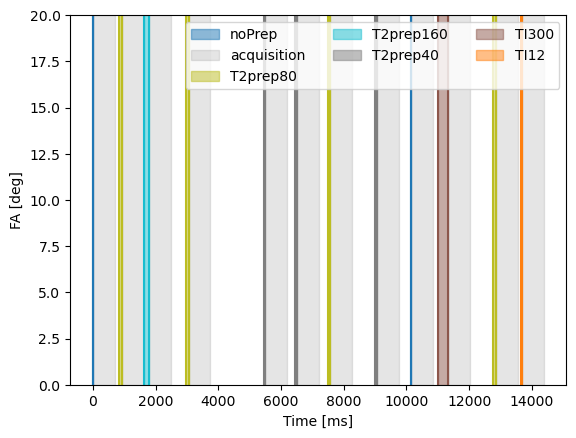

In [20]:
visualize_sequence(sequences[0])

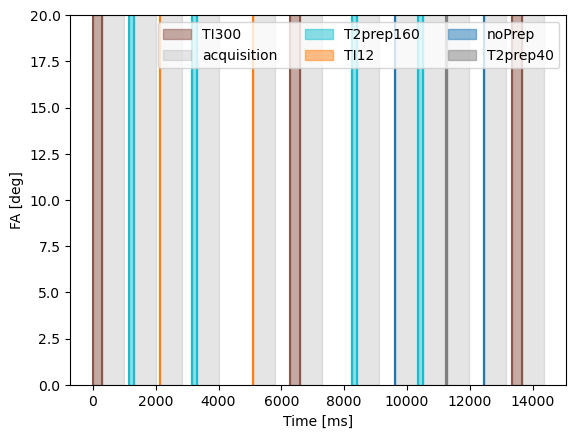

In [21]:
visualize_sequence(sequences[-1])

In [22]:
weightingmatrix@sequences[0].crlb

array([[ 2.47582082e+00,  3.97648284e-02,  1.66152836e-03],
       [ 5.39339388e+00,  6.57446880e+00, -8.08830929e-03],
       [ 7.27055320e+02, -2.60948270e+01,  8.49471089e-01]])

In [23]:
print(np.trace(weightingmatrix@sequences[0].crlb))
print(np.trace(weightingmatrix@sequences[-1].crlb))


9.899760704944068
33.98359047424411
